<a href="https://colab.research.google.com/github/venkatarajeshzilla/TCS-Online_Internship/blob/main/TCS_InternshipTask_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       104
         1.0       0.00      0.00      0.00        21

    accuracy                           0.82       125
   macro avg       0.42      0.50      0.45       125
weighted avg       0.69      0.82      0.75       125


Confusion Matrix:

[[103   1]
 [ 21   0]]

AUC Score: 0.488095238095238


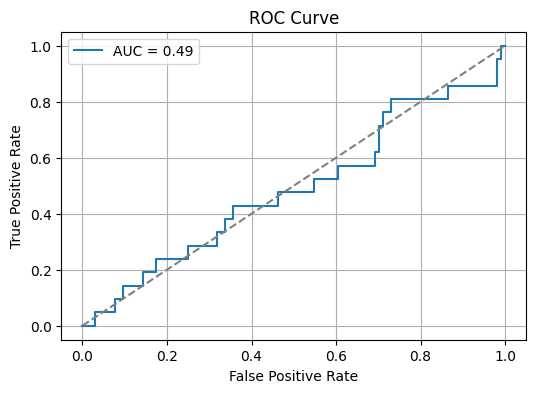

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 2: Load Data
df = pd.read_csv("data_set.csv")

# Step 3: Data Cleaning
df.drop(columns=["Customer_ID"], inplace=True, errors='ignore')  # drop ID column

# Impute missing values
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Step 4: Encoding Categorical Columns
df = pd.get_dummies(df, drop_first=True)

# Step 5: Split Dataset
X = df.drop("Delinquent_Account", axis=1)
y = df["Delinquent_Account"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# AUC Score
auc = roc_auc_score(y_test, y_prob)
print("\nAUC Score:", auc)

# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-3-1477575980.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        75
           1       1.00      0.88      0.94        84

    accuracy                           0.94       159
   macro avg       0.94      0.94      0.94       159
weighted avg       0.94      0.94      0.94       159

Confusion Matrix:
 [[75  0]
 [10 74]]
AUC Score: 0.971031746031746


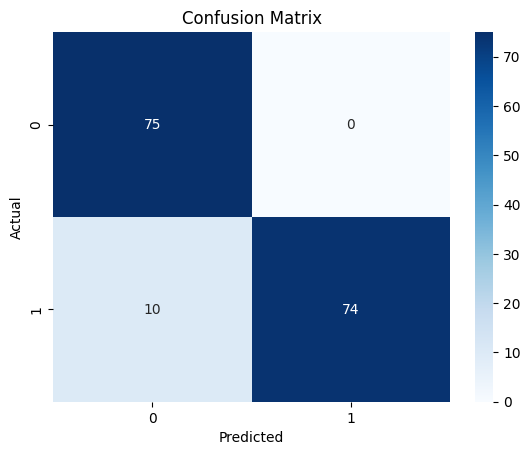

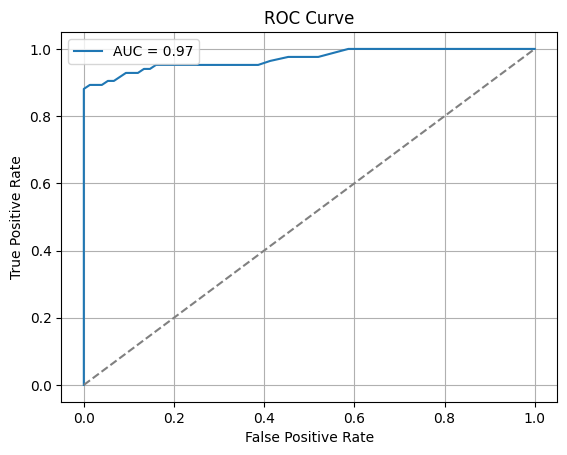

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data_set.csv")

# Handle missing values
df['Income'].fillna(df['Income'].median(), inplace=True)
df.drop(columns=['Customer_ID'], inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.drop('Delinquent_Account', axis=1)
y = df['Delinquent_Account']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance
X_res, y_res = SMOTE(random_state=42).fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
